# Noah Chan

## What is the impact of changes in course format (e.g., online, in-person, hybrid) on student course selection and academic performance in higher education?

Online classes and remote work have existed in some form for several decades, but they have become much more prevalent and widespread in recent years due to advancements in technology and the outbreak of COVID-19 pandemic. I am interested in if the rise of hybrid and online classes will completely replace in-person classes and if they are actually better for students. The research question is seeking to investigate the direction and strength of the relatiponshipship between student course selection and academic performance according to different course formats, and to determine whether course format is a significant predictor of student grades at UBC based on the data available on UBC Grades.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from my_code_3 import project_functions3

In [4]:
file_path = ('../data/raw/rawdata.csv')
df = project_functions3.load_n_process(file_path)
df

Year Subject Course Average        Percentile (25) Percentile (75)
                              mean median        quantile        quantile
0    2018.0    ECON  101.0    70.0   70.0            96.0             8.0
1    2018.0    ECON  102.0    70.0   69.0            97.0             3.0
2    2018.0    ECON  204.0    65.0   65.0           100.0            12.0
3    2018.0    ECON  205.0    58.0   58.0            98.0             5.0
4    2018.0    ECON  210.0    72.0   72.0            93.0            50.0
..      ...     ...    ...     ...    ...             ...             ...
861  2021.0    POLI  460.0    85.0   85.0            90.0            76.0
862  2021.0    POLI  462.0    80.0   80.0            87.0            40.0
863  2021.0    POLI  464.0    82.0   83.0            89.0            73.0
864  2021.0    POLI  465.0    80.0   80.0            76.0            88.0
865  2021.0    POLI  492.0    86.0   86.0            92.0            76.0

[866 rows x 7 columns]

Text(0.5, 1.0, 'Average Grade of two UBC campuses for (2018-2021)')

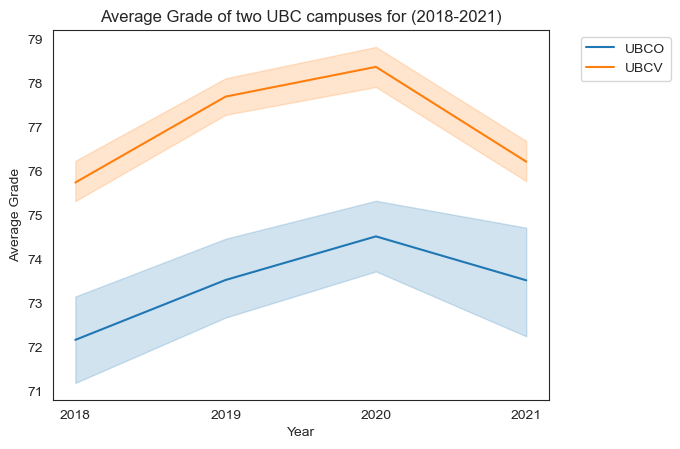

In [74]:
plot1 = sns.lineplot(x='Year', y='Avg', data=df,hue='Campus')
sns.set_style("white")
plt.xticks([2018, 2019, 2020, 2021])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Average Grade')
plt.title('Average Grade of two UBC campuses for (2018-2021)')
#This graph illustrates and compares the average grade between two campuses during 2018 to 2021.

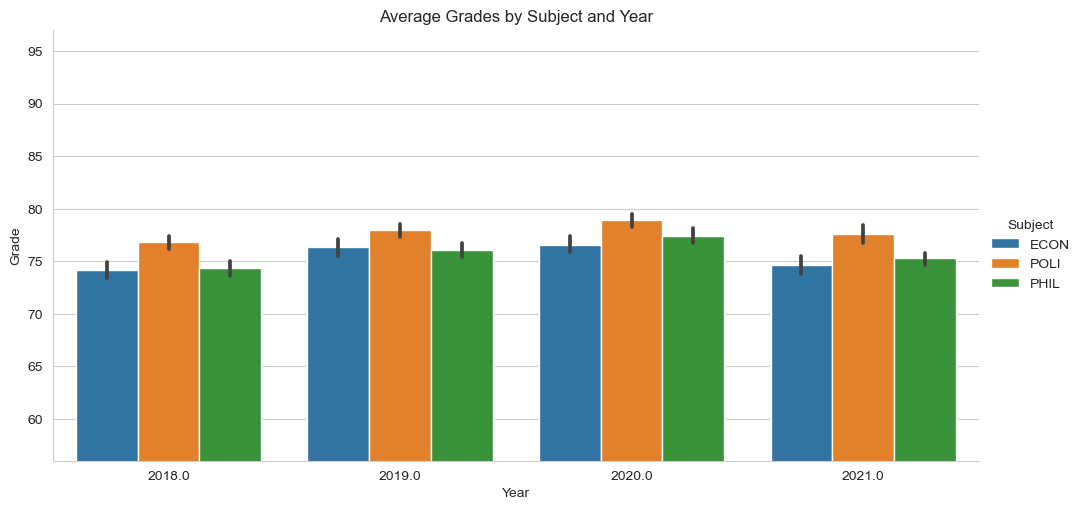

In [ ]:
ymin = np.floor(df["Avg"].min())
ymax = np.ceil(df["Avg"].max())
sns.set_style("whitegrid")
plot2 = sns.catplot(x="Year", y="Avg", hue="Subject", kind="bar", data=df, height=5, aspect=2)
plt.title('Average Grades by Subject and Year')
plt.ylabel('Grade')
plot2.set(ylim=(ymin, ymax))
sns.set_context("poster", font_scale=0.5)
#This bar chart illustrates the changes in performance of students in the three subjects ECON, POLI, and PHIL from 2018 to 2021.


Text(0, 0.5, 'Grade')

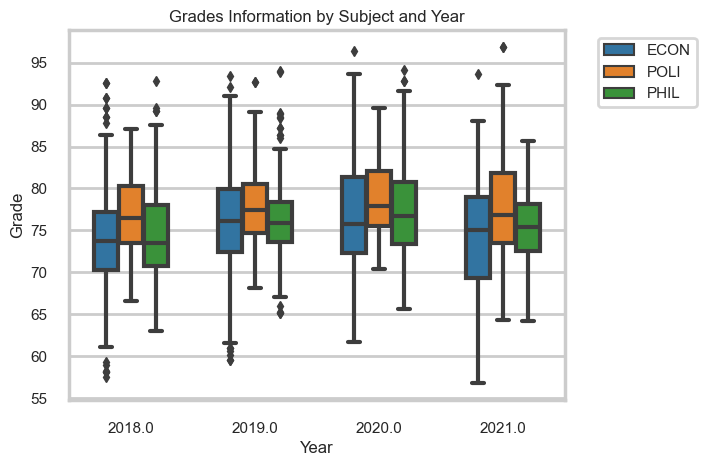

In [ ]:
plot3 = sns.boxplot(x="Year", y="Avg", hue="Subject", data=df, width=0.6)
sns.set_style("whitegrid")
sns.set_palette("Set2")     
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Grades Information by Subject and Year')
plt.ylabel('Grade')
#This box plot illustrates the median, quartiles, and range of the grade over the years, which gives us a deeper understanding of the data.
